In [1]:
# NVIDIA GPU Deep Learning Acceleration
# Keras Example Code
# Source from: 林大貴
# Reference Book#1: TensorFlow+Keras深度學習人工智慧實務應用 ISBN：9789864342167 作者: 林大貴 出版社: 博碩出版社
# Reference Book#2: TensorFlow+Keras深度学习人工智能实践应用 ISBN：9787302493020 作者: 林大貴 出版社: 清华大学出版社
### Special thanks for author's authorization

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
import numpy as np
from keras.utils import np_utils
np.random.seed(10)

In [4]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto() #device_count = {'CPU' : 1, 'GPU' : 1}
config.gpu_options.allow_growth = True #dynamically grow the memory used on the GPU
config.log_device_placement = True # to log device placement (onn which device the operation ran)

sess = tf.Session(config=config)
set_session(sess) # set this Tensorflow session as the default session for Keras

In [5]:
(x_Train,y_Train),(x_Test,y_Test)= mnist.load_data()

In [6]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [7]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [8]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(filters=16,
                kernel_size=(3,3),
                padding='same',
                input_shape=(28,28,1),
                activation='relu'))
model.add(Conv2D(filters=16,
                kernel_size=(3,3),
                padding='same',
                activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                padding='same',
                activation='relu'))
model.add(Conv2D(filters=36,
                kernel_size=(5,5),
                padding='same',
                activation='relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(128,activation='relu'))

In [18]:
model.add(Dropout(0.5))

In [19]:
model.add(Dense(10,activation='softmax'))

In [20]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        28836     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
__________

In [21]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])

In [22]:
import time
print(time.asctime(time.localtime(time.time())))
train_history=model.fit(x=x_Train4D_normalize,
                       y=y_TrainOneHot, validation_split=0.2,
                       epochs=10, batch_size=300, verbose=2)  # default batch_size = 300
print(time.asctime(time.localtime(time.time())))

Thu Jun 20 05:30:16 2019
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 19s - loss: 0.4361 - acc: 0.8630 - val_loss: 0.0765 - val_acc: 0.9751
Epoch 2/10
 - 2s - loss: 0.1109 - acc: 0.9662 - val_loss: 0.0524 - val_acc: 0.9845
Epoch 3/10
 - 2s - loss: 0.0838 - acc: 0.9755 - val_loss: 0.0417 - val_acc: 0.9871
Epoch 4/10
 - 3s - loss: 0.0656 - acc: 0.9800 - val_loss: 0.0394 - val_acc: 0.9893
Epoch 5/10
 - 2s - loss: 0.0547 - acc: 0.9841 - val_loss: 0.0359 - val_acc: 0.9899
Epoch 6/10
 - 2s - loss: 0.0479 - acc: 0.9859 - val_loss: 0.0333 - val_acc: 0.9903
Epoch 7/10
 - 2s - loss: 0.0413 - acc: 0.9874 - val_loss: 0.0308 - val_acc: 0.9917
Epoch 8/10
 - 2s - loss: 0.0356 - acc: 0.9893 - val_loss: 0.0305 - val_acc: 0.9905
Epoch 9/10
 - 2s - loss: 0.0335 - acc: 0.9898 - val_loss: 0.0280 - val_acc: 0.9908
Epoch 10/10
 - 2s - loss: 0.0330 - acc: 0.9896 - val_loss: 0.0239 - val_acc: 0.9934
Thu Jun 20 05:30:58 2019


In [23]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

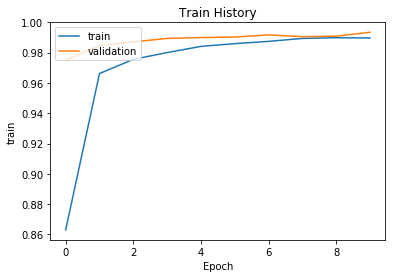

In [24]:
show_train_history(train_history,'acc','val_acc')

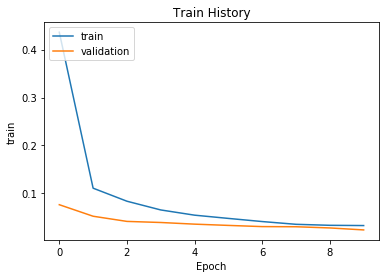

In [25]:
show_train_history(train_history,'loss','val_loss')

In [26]:
scores = model.evaluate(x_Test4D_normalize,y_TestOneHot)
scores[1]

10000/10000 [==============================] - 0s 41us/step


0.9938

In [27]:
prediction = model.predict_classes(x_Test4D_normalize)

In [28]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
prediction[5:20]

array([1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 5, 4])

In [30]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title='label='+str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

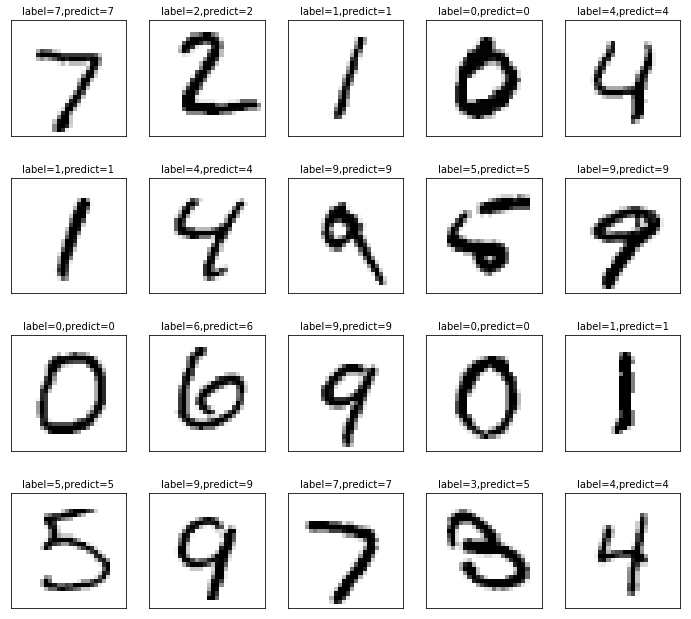

In [31]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0,num=20)

In [32]:
import pandas as pd
pd.crosstab(y_Test,prediction,
           rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,1,1,0,0
1,0,1134,0,0,0,0,0,0,1,0
2,0,0,1031,0,0,0,0,1,0,0
3,0,0,1,1004,0,3,0,0,2,0
4,0,0,1,0,974,0,1,0,2,4
5,1,0,0,5,0,885,1,0,0,0
6,3,2,0,1,1,4,946,0,1,0
7,0,1,4,0,0,0,0,1022,1,0
8,2,0,2,4,0,1,0,0,964,1
